A real-time financial data API delivered in JSON or Pandas formats. First the package needs to be installed:

In [1]:
!pip install alpha_vantage

Or install with pandas support, simply install pandas too:

In [ ]:
# pip install alpha_vantage pandas

If you want to install from source, then use:

In [ ]:
# git clone https://github.com/RomelTorres/alpha_vantage.git
# pip install -e alpha_vantage

# Usage
To get data from the API, simply import the library and call the object with your API key. Next, get ready for some awesome, free, realtime finance data. Your API key may also be stored in the environment variable ALPHAVANTAGE_API_KEY.

In [15]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='L2PZAOXWJKDH544E')
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('GOOGL')

You may also get a key from rapidAPI. Use your rapidAPI key for the key variable, and set rapidapi=True

In [16]:
ts = TimeSeries(key='L2PZAOXWJKDH544E', rapidapi=True)

Internally there is a retries counter, that can be used to minimize connection errors (in case that the API is not able to respond in time), the default is set to 5 but can be increased or decreased whenever needed.

In [17]:
ts = TimeSeries(key='L2PZAOXWJKDH544E', retries='YOUR_RETRIES')

TypeError: __init__() got an unexpected keyword argument 'retries'

The library supports giving its results as json dictionaries (default), pandas dataframe (if installed) or csv, simply pass the parameter output_format='pandas' to change the format of the output for all the API calls in the given class. Please note that some API calls do not support the csv format (namely ForeignExchange, SectorPerformances and TechIndicators) because the API endpoint does not support the format on their calls either.

In [18]:
ts = TimeSeries(key='L2PZAOXWJKDH544E', output_format='pandas')

The pandas data frame given by the call, can have either a date string indexing or an integer indexing (by default the indexing is 'date'), depending on your needs, you can use both.

In [19]:
# For the default date string index behavior
ts = TimeSeries(key='L2PZAOXWJKDH544E', output_format='pandas', indexing_type='date')
# For the default integer index behavior
ts = TimeSeries(key='L2PZAOXWJKDH544E', output_format='pandas', indexing_type='integer')

# Data frame structure
The data frame structure is given by the call on alpha vantage rest API. The column names of the data frames are the ones given by their data structure. For example, the following call:

In [20]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key='L2PZAOXWJKDH544E', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')
pprint(data.head(2))

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2021-04-07 20:00:00   250.38   250.38  250.38    250.38      210.0
2021-04-07 19:58:00   250.15   250.38  250.15    250.38      255.0


The headers from the data are specified from Alpha Vantage (in previous versions, the numbers in the headers were removed, but long term is better to have the data exactly as Alpha Vantage produces it.)

# Plotting
## Time Series
Using pandas support we can plot the intra-minute value for 'MSFT' stock quite easily:

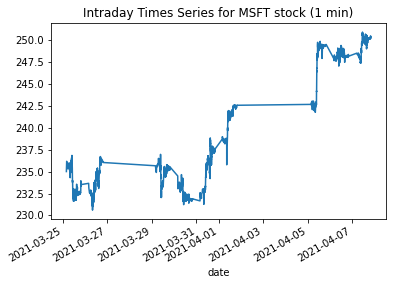

In [21]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='L2PZAOXWJKDH544E', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT', interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for MSFT stock (1 min)')
plt.show()

## Technical Indicators
The same way we can get pandas to plot technical indicators like Bollinger Bands®

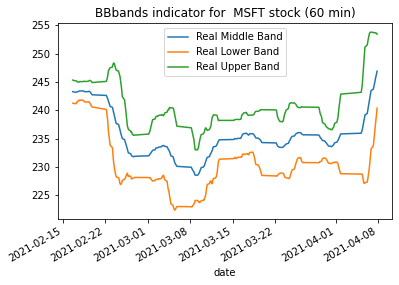

In [23]:
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key='L2PZAOXWJKDH544E', output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for MSFT stock (60 min)')
plt.show()

## Sector Performance
We can also plot sector performance just as easy:

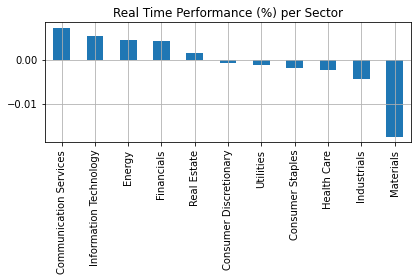

In [24]:
from alpha_vantage.sectorperformance import SectorPerformances
import matplotlib.pyplot as plt

sp = SectorPerformances(key='L2PZAOXWJKDH544E', output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

## Crypto Currencies
We can also plot crypto currencies prices like BTC:

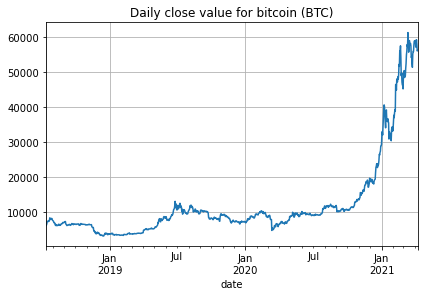

In [25]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib.pyplot as plt

cc = CryptoCurrencies(key='L2PZAOXWJKDH544E', output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

## Foreign Exchange (FX)
The foreign exchange endpoint has no metadata, thus only available as json format and pandas (using the 'csv' format will raise an Error).

In [26]:
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='L2PZAOXWJKDH544E')
# There is no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency='BTC',to_currency='USD')
pprint(data)

{'1. From_Currency Code': 'BTC',
 '2. From_Currency Name': 'Bitcoin',
 '3. To_Currency Code': 'USD',
 '4. To_Currency Name': 'United States Dollar',
 '5. Exchange Rate': '56598.21000000',
 '6. Last Refreshed': '2021-04-08 04:07:01',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '56598.20000000',
 '9. Ask Price': '56598.21000000'}


## Asyncio support
From version 2.2.0 on, asyncio support will now be available. This is only for python versions 3.5+. If you do not have 3.5+, the code will break.

The syntax is simple, just mark your methods with the async keyword, and use the await keyword.

Here is an example of a for loop for getting multiple symbols asyncronously. This greatly improving the performance of a program with multiple API calls.

In [28]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries

symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']


async def get_data(symbol):
    ts = TimeSeries(key='L2PZAOXWJKDH544E')
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

loop = asyncio.get_event_loop()
tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)
results = loop.run_until_complete(group1)
loop.close()
print(results)

RuntimeError: This event loop is already running

We have written a much more in depth article to explain asyncio for those who have never used it but want to learn about asyncio, concurrency, and multi-threading. Check it out here: Which Should You Use: Asynchronous Programming or Multi-Threading?